Visualization of distributions: https://seaborn.pydata.org/tutorial/distributions.html

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set(color_codes=True)


In [3]:
#x = np.random.normal(size=100)
#sns.distplot(x);

In [4]:
#upload a file from the computer
#from google.colab import files
#uploaded = files.upload()


[How to upload a file from goolge drive](https://)

3) From Google Drive via PyDrive
This is the most complicated of the three methods. I’ll show it for those that have uploaded CSV files into their Google Drive for workflow control. First, type in the following code:

In [4]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

When prompted, click on the link to get authentication to allow Google to access your Drive. You should see a screen with “Google Cloud SDK wants to access your Google Account” at the top. After you allow permission, copy the given verification code and paste it in the box in Colab.
Once you have completed verification, go to the CSV file in Google Drive, right-click on it and select “Get shareable link”. The link will be copied into your clipboard. Paste this link into a string variable in Colab.

In [ ]:
#link = 'https://drive.google.com/open?id=1DPZZQ43w8brRhbEMolgLqOWKbZbE-IQu' # The shareable link

my link is: https://drive.google.com/file/d/12F49XfsJPFNdZFgSM0KETmIk7M9AUVwy/view?usp=sharing


What you want is the id portion after the equal sign. To get that portion, type in the following code:

In [ ]:
#https://drive.google.com/file/d/15El1_trVvaZwtnWBAili73JTcu0vHqHV/view?usp=sharing

In [ ]:
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='

In [7]:
link='https://drive.google.com/file/d/open?id=15El1_trVvaZwtnWBAili73JTcu0vHqHV'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

15El1_trVvaZwtnWBAili73JTcu0vHqHV


Finally, type in the following code to get this file into a dataframe

In [8]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

NameError: ignored

The document was a .txt and wasn't displaying well. I converted separately to csv and here is the new link: https://drive.google.com/file/d/118VsvBFR1Oxh-KG1FrbgK6A21kK1usbv/view?usp=sharing
I will try again. 


In [8]:
df3.head

<bound method NDFrame.head of        a    b       c       d  e    f
0    NaN  0.0  0.0008  0.0005  0  0.0
1    NaN  0.0  0.0008  0.0005  0  0.0
2    NaN  0.0  0.0008  0.0005  0  0.0
3    NaN  0.0  0.0008  0.0005  0  0.0
4    NaN  0.0  0.0008  0.0005  0  0.0
...   ..  ...     ...     ... ..  ...
3997 NaN  0.0  0.0008  0.0005  0  0.0
3998 NaN  0.0  0.0008  0.0005  0  0.0
3999 NaN  0.0  0.0008  0.0005  0  0.0
4000 NaN  0.0  0.0008  0.0005  0  0.0
4001 NaN  0.0  0.0008  0.0005  0  0.0

[4002 rows x 6 columns]>

In [10]:
print(df3.head(10))

    a    b       c       d  e    f
0 NaN  0.0  0.0008  0.0005  0  0.0
1 NaN  0.0  0.0008  0.0005  0  0.0
2 NaN  0.0  0.0008  0.0005  0  0.0
3 NaN  0.0  0.0008  0.0005  0  0.0
4 NaN  0.0  0.0008  0.0005  0  0.0
5 NaN  0.0  0.0008  0.0005  0  0.0
6 NaN  0.0  0.0008  0.0005  0  0.0
7 NaN  0.0  0.0008  0.0005  0  0.0
8 NaN  0.0  0.0008  0.0005  0  0.0
9 NaN  0.0  0.0008  0.0005  0  0.0


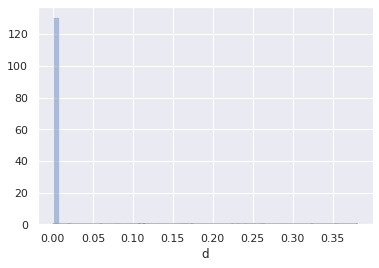

In [9]:
x = df3.d
#setting the  figure size
#fig = plt.gcf()
#fig.set_size_inches(12, 8)
#y = df3.YYYY
sns.set(font_scale=1)
sns.distplot(x);

In [ ]:
#changing the font size
#https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

In [ ]:
#x = df3.d
#sns.distplot(x);
#sns.set(font_scale=1)

AMAZINF WEBSITE: https://seaborn.pydata.org/tutorial/distributions.html


Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

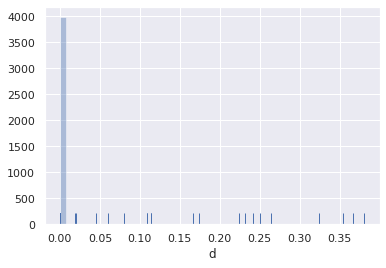

In [12]:
sns.set(font_scale=1)
sns.distplot(x, kde=False, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

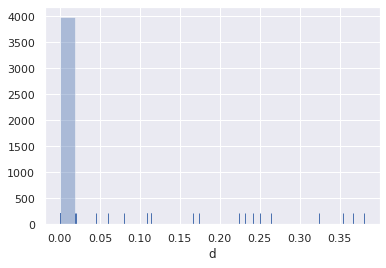

In [13]:
sns.distplot(x, bins=20, kde=False, rug=True);

In [ ]:
sns.distplot(x, hist=False, rug=True);
sns.kdeplot(x, shade=True);

In [1]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

NameError: ignored

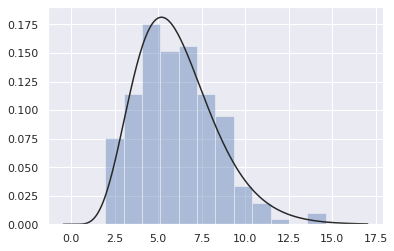

In [ ]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);




In [ ]:
gk=df3.groupby(['deaths'])
gk.first()


record  YYYY  weapon  OECD  Iraq/Afghan
deaths                                         
1           45  1968       6     0            0
2           27  1968       2     0            0
3           96  1968       6     1            0
4          177  1976       2     1            0
5           80  1968       6     0            0
...        ...   ...     ...   ...          ...
329       4230  1985       2     1            0
331      19321  2004       4     0            0
400      10201  1998       4     0            0
500      37993  2007       2     0            1
2749      7757  2001       6     1            0

[117 rows x 5 columns]

In [ ]:
#write to a file
#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
#https://stackoverflow.com/questions/53898836/export-dataframe-as-csv-file-from-google-colab-to-google-drive

In [ ]:
#this one works
gk.to_csv('data.csv')
!cp data.csv "drive/My Drive/"
#you can make this better by putting it in the exact location--- 
#copy the file and getthe sharable link

In [ ]:
#this doesn't work because series are not mutable.
#sns.lineplot(x=gk.record, y=gk.deaths)


I am going to try this: https://stackoverflow.com/questions/45299305/how-to-plot-pandas-groupby-values-in-a-graph


In [ ]:
#doesn't work
gk=df3.groupby(['record']).size()
gk.plot.bar()

In [ ]:
df = pd.DataFrame(gk, columns = ['deaths', 'record'])

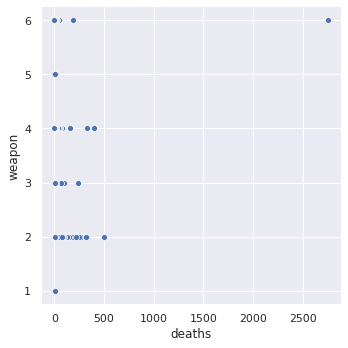

In [ ]:
sns.relplot(x="deaths", y="weapon", data=df3)

In [ ]:
plt.setp(df3._legend.get_title(), fontsize=20)

sns.relplot(x="deaths", y="YYYY", hue="weapon", data=df3);


AttributeError: ignored

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: ignored

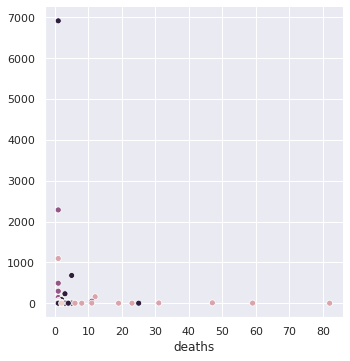

In [ ]:
sns.relplot(x="deaths", y=df3.groupby(['deaths']).size(), hue="weapon", data=df3)

In [ ]:
link2='https://drive.google.com/file/d/open?id=1Quuk7Fmt7jlpn3k4sduwAzcsB7gPk4Fz'
fluff, id = link2.split('=')
print (id) # Verify that you have everything after '='
#my link says:
#https://drive.google.com/file/d/1Quuk7Fmt7jlpn3k4sduwAzcsB7gPk4Fz/view?usp=sharing

1Quuk7Fmt7jlpn3k4sduwAzcsB7gPk4Fz


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df4 = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

AttributeError: ignored